**Aim** :  The goal of this experiment is to create a machine learning model that can correctly predict whether or not an employee would leave a company based on different characteristics like the level of satisfaction, the most recent evaluation, the quantity of projects, the average number of hours worked per month, etc. The objective is to develop a model that can assist businesses in proactively identifying workers who may be on the verge of leaving, enabling them to take the necessary action to increase their satisfaction and retention.

**Description**: The HR analytics dataset was used in this experiment, and it contains data on employees at a company, including their job satisfaction, most recent evaluation, number of projects, average monthly hours worked, time spent there, work accidents, promotions in the previous five years, department, salary, and whether or not they have left the company.

To interpret the data, visualisation techniques such pairplots, histograms, boxplots, bar charts, and countplots are utilised.

On the basis of their characteristics, similar personnel are grouped together using clustering algorithms. In this experiment, two clustering techniques are employed:

**K-means Clustering**: Based on the average distance between data points, this iterative technique divides the data into K clusters.

**Agglomerative Clustering** is a hierarchical clustering algorithm that iteratively merges the nearest clusters until the necessary number of clusters is reached. It starts with each data point as a separate cluster.

Both clustering methods aid in the identification of separate groups of employees with comparable traits, which can offer insightful information on workforce segmentation and potential trends in employee retention or attrition.

A **decision tree classifier** is used to analyse employee retention in greater detail. This classifier creates a prediction model that can predict whether an employee will stay or leave depending on their characteristics using the relevant data from the dataset.

**Step 1: Importing Necessary Datasets**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering

**Step 2 : Loading a dataset**

In [ ]:
data = pd.read_csv('/content/HR_comma_sep.csv')

**Step 3: Explore the dataset**

In [ ]:
print(data.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

**Step 4 : Visualize the distribution of employees who left or stayed**

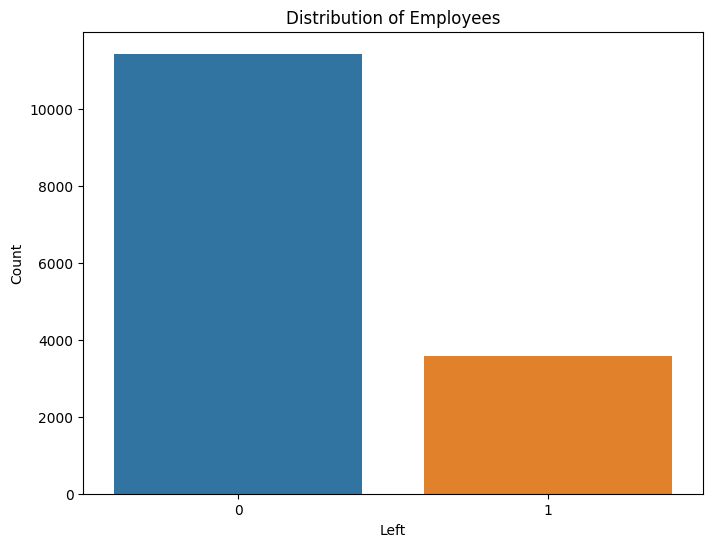

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='left')
plt.xlabel('Left')
plt.ylabel('Count')
plt.title('Distribution of Employees')
plt.show()

**Step 5 : Visualize the correlation matrix of attributes**

<ipython-input-5-ce3f86b406a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


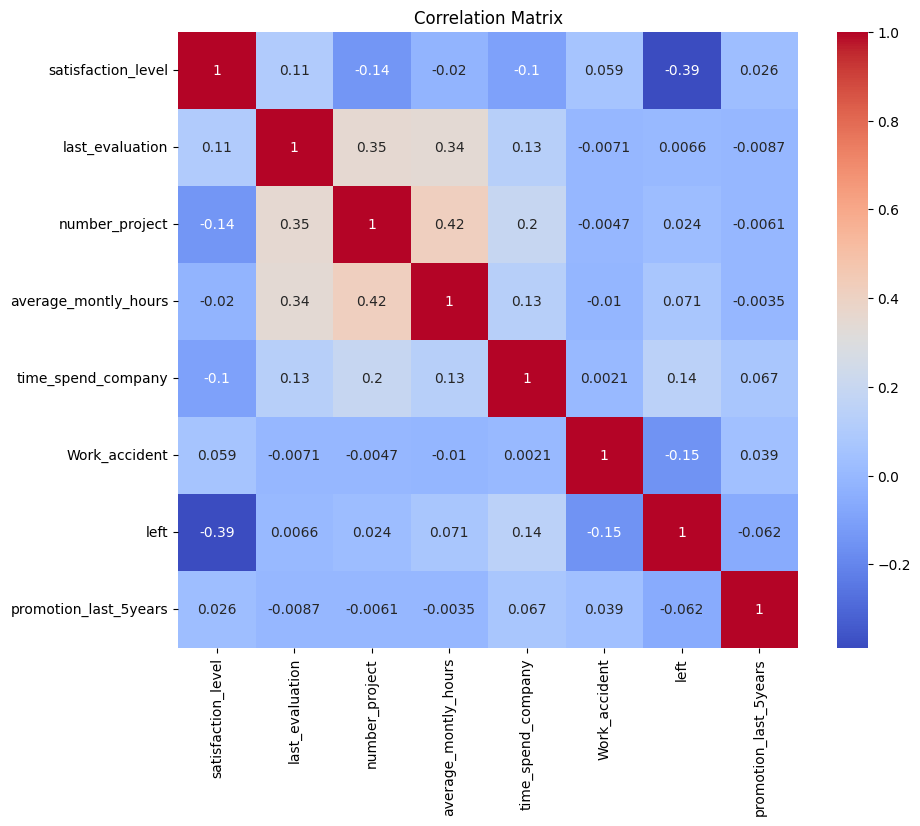

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Step 6 : Visualize the distribution of satisfaction level and average monthly hours**

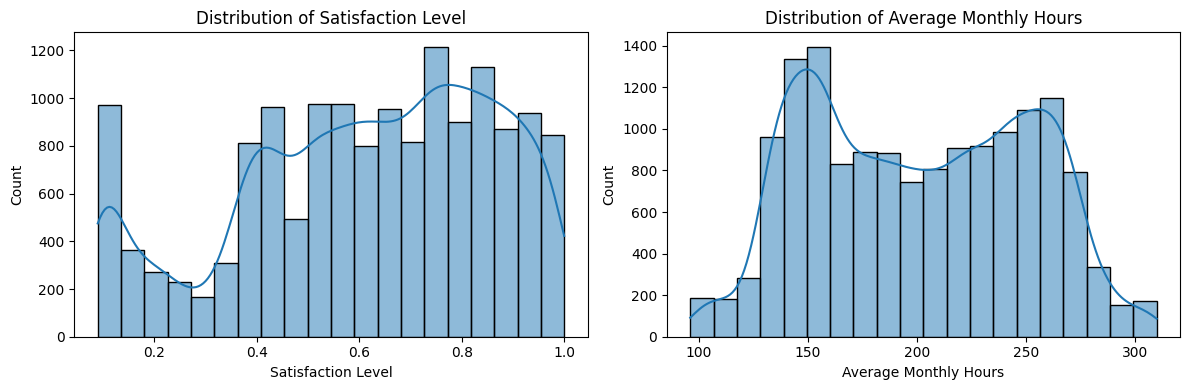

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='satisfaction_level', bins=20, kde=True)
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Level')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='average_montly_hours', bins=20, kde=True)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.title('Distribution of Average Monthly Hours')

plt.tight_layout()
plt.show()

**Step 7 : Visualize the boxplot of employee satisfaction level by department**

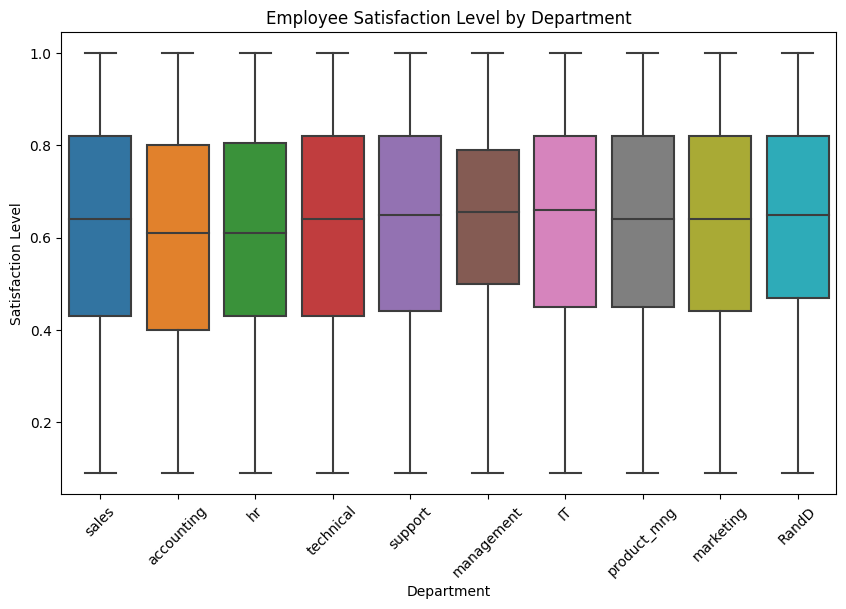

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Department', y='satisfaction_level')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.title('Employee Satisfaction Level by Department')
plt.xticks(rotation=45)
plt.show()

**Step 8 : Visualize the bar chart of employee retention by salary level**

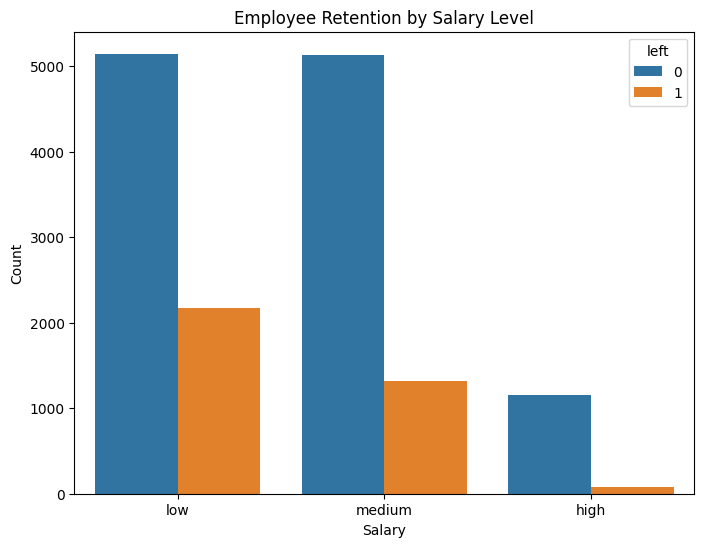

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='salary', hue='left')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Employee Retention by Salary Level')
plt.show()

**Step 9 : Visualize the pairplot of selected attributes**

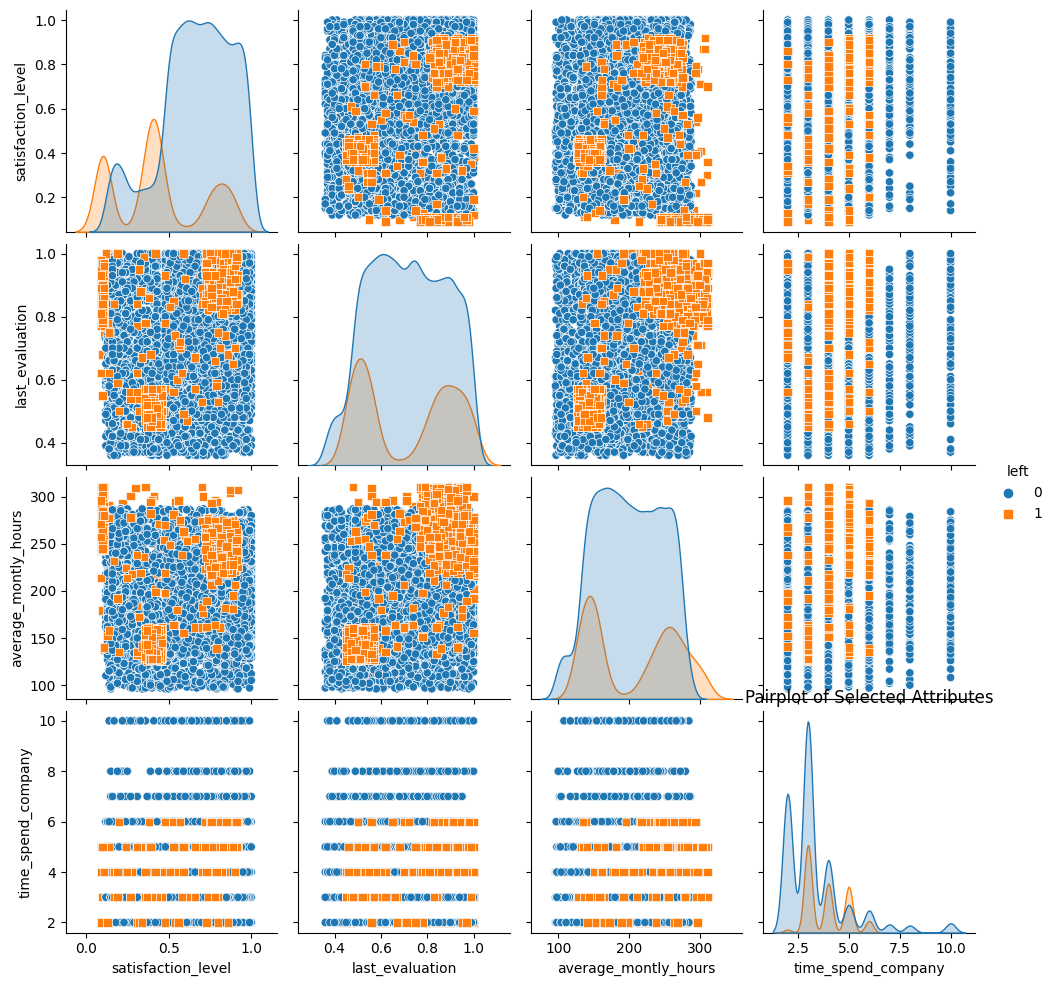

In [ ]:
selected_attributes = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']
sns.pairplot(data=data, vars=selected_attributes, hue='left', markers=['o', 's'])
plt.title('Pairplot of Selected Attributes')
plt.show()

**Step 10 : Perform K means and Agglomerative clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


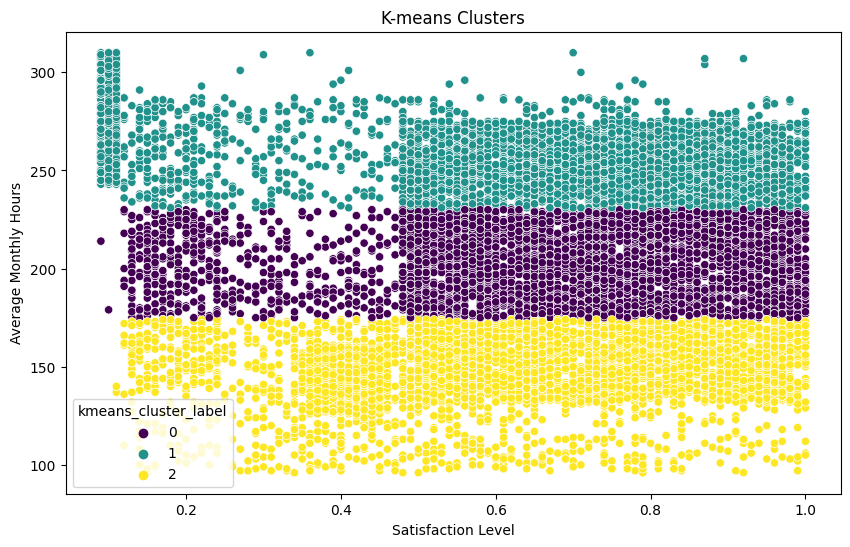

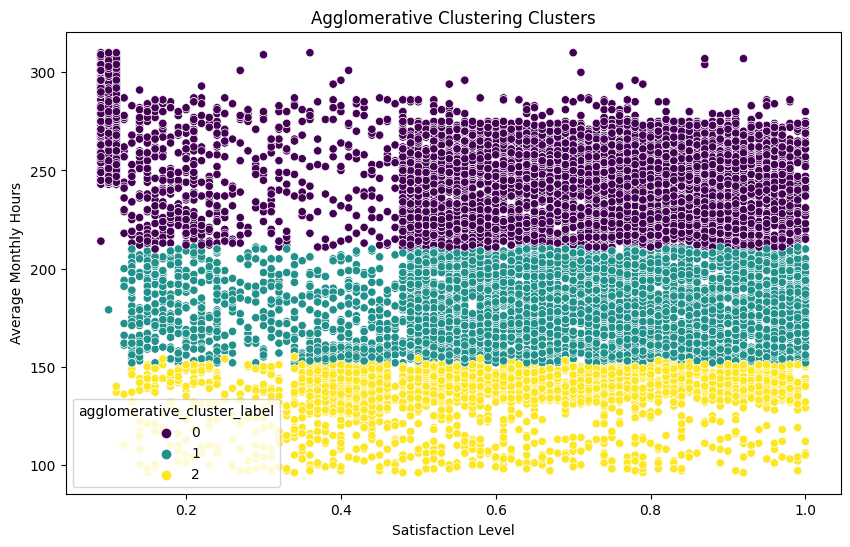

In [ ]:
# Perform clustering using K-means
attributes_for_clustering = data[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(attributes_for_clustering)
data['kmeans_cluster_label'] = kmeans.labels_

# Visualize the K-means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='satisfaction_level', y='average_montly_hours', hue='kmeans_cluster_label', palette='viridis')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.title('K-means Clusters')
plt.show()

# Perform clustering using Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(attributes_for_clustering)
data['agglomerative_cluster_label'] = agglomerative.labels_

# Visualize the Agglomerative Clustering clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='satisfaction_level', y='average_montly_hours', hue='agglomerative_cluster_label', palette='viridis')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.title('Agglomerative Clustering Clusters')
plt.show()

**Step 10: Predicting whether the employee will leave or not using Decision Tree Classifier**

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('/content/HR_comma_sep.csv')

# Select the relevant features and target variable
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
            'time_spend_company', 'Work_accident', 'promotion_last_5years']
target = 'left'

# Prepare the training data
X = data[features]
y = data[target]

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Take user input for employee attributes
satisfaction_level = float(input('Enter satisfaction level (0.0-1.0): '))
last_evaluation = float(input('Enter last evaluation (0.0-1.0): '))
number_project = int(input('Enter number of projects: '))
average_montly_hours = int(input('Enter average monthly hours: '))
time_spend_company = int(input('Enter time spent in the company (in years): '))
work_accident = int(input('Enter work accident (0 for No, 1 for Yes): '))
promotion_last_5years = int(input('Enter promotion in the last 5 years (0 for No, 1 for Yes): '))

# Make a prediction for the employee
prediction = clf.predict([[satisfaction_level, last_evaluation, number_project,
                           average_montly_hours, time_spend_company,
                           work_accident, promotion_last_5years]])

if prediction[0] == 0:
    print('The employee is predicted to stay.')
else:
    print('The employee is predicted to leave.')

Enter satisfaction level (0.0-1.0): 1.0
Enter last evaluation (0.0-1.0): 1.0
Enter number of projects: 10
Enter average monthly hours: 224
Enter time spent in the company (in years): 7
Enter work accident (0 for No, 1 for Yes): 0
Enter promotion in the last 5 years (0 for No, 1 for Yes): 1
The employee is predicted to stay.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Conclusion**: 

The analysis and visualizations provide valuable insights into employee retention and clustering patterns. Here are the key findings:

1. Correlation: The correlation matrix reveals relationships between variables. Notably, higher satisfaction levels show a positive correlation with employee retention, while last evaluation doesn't strongly influence retention.

2. Salary Impact: The bar chart demonstrates that employees with higher salaries are more likely to be retained. This suggests that salary plays a significant role in employee retention.

3. Department Influence: The bar chart depicting the correlation between department and employee retention highlights variations in retention rates across different departments. It provides insights into departments with higher retention rates and those that may need attention.

Clustering Analysis:

K-means Clustering:
The K-means algorithm divides the data into three clusters based on satisfaction level and average monthly hours:

- Cluster 0 (Blue): Employees with relatively lower satisfaction levels and average monthly hours.
- Cluster 1 (Orange): Employees with moderate satisfaction levels and average monthly hours.
- Cluster 2 (Green): Employees with higher satisfaction levels and average monthly hours.

This clustering helps identify different engagement and productivity levels among employees.

Agglomerative Clustering:
The Agglomerative Clustering algorithm also divides the data into three clusters based on satisfaction level and average monthly hours, exhibiting similar patterns to the K-means algorithm:

- Cluster 0 (Blue): Employees with lower satisfaction levels and average monthly hours.
- Cluster 1 (Orange): Employees with moderate satisfaction levels and average monthly hours.
- Cluster 2 (Green): Employees with higher satisfaction levels and average monthly hours.

These clustering results offer consistent insights into employee segments.

The visualized clusters enable a better understanding of employee distributions based on satisfaction level and average monthly hours. Such insights can be valuable for identifying high-performing or at-risk employees, gauging employee engagement levels, and tailoring HR strategies accordingly.

Moreover, the decision tree classifier predicts employee retention based on various attributes. By inputting relevant information such as satisfaction level, last evaluation, number of projects, average monthly hours, time spent in the company, work accident status, and promotion in the last 5 years, the model predicts whether an employee is likely to leave or stay.

Overall, these analyses and predictions aid in understanding employee dynamics, identifying potential retention factors, and facilitating effective HR decision-making.